# Clipping Data with GeoPandas
Here we show how to load shape files with GeoPandas and use the resulting geometries to clip data to geographic boundaries.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np

## Create some random data points

In [2]:
import random
latitude = []
longitude = []
for i in range(100000):
    latitude.append(random.uniform(-90.0, 90.0))
    longitude.append(random.uniform(-180.0, 180.0))
rand_df = pd.DataFrame({'latitude': latitude, 'longitude': longitude})

In [3]:
rand_df.head()

,latitude,longitude
0,88.442790,-113.515139
1,-18.761596,62.383587
2,-89.815113,82.487650
3,-49.016746,-111.541649
4,17.318202,85.083978


## Convert DataFrame to GeoDataFrame

In [4]:
import geopandas

In [5]:
rand_gdf = geopandas.GeoDataFrame(
    rand_df, geometry=geopandas.points_from_xy(rand_df.longitude, rand_df.latitude))

In [6]:
rand_gdf.head(10)

,latitude,longitude,geometry
0,88.442790,-113.515139,POINT (-113.51514 88.44279)
1,-18.761596,62.383587,POINT (62.38359 -18.76160)
2,-89.815113,82.487650,POINT (82.48765 -89.81511)
3,-49.016746,-111.541649,POINT (-111.54165 -49.01675)
4,17.318202,85.083978,POINT (85.08398 17.31820)
5,84.738440,120.606756,POINT (120.60676 84.73844)
6,-28.756320,-61.654275,POINT (-61.65427 -28.75632)
7,29.692652,-112.864564,POINT (-112.86456 29.69265)
8,80.187154,109.906012,POINT (109.90601 80.18715)
9,45.544701,-145.131642,POINT (-145.13164 45.54470)


## Plot Random Data
First we define a plotting function that we can use going forward. I use a LambertConformal projection which is probably a bit better than PlateCarree for the lower 48.

In [7]:
def plot_us(gdf):
    # define map extent
    extent = [-122, -70, 20, 52]

    # better projection
    proj = ccrs.LambertConformal(central_longitude=np.mean(extent[:2]), central_latitude=np.mean(extent[2:]))

    # create axes
    fig, ax1 = plt.subplots(figsize=(10,6), subplot_kw={'projection': proj})
    ax1.set_extent(extent)
    ax1.add_feature(cfeature.OCEAN);
    ax1.add_feature(cfeature.STATES, edgecolor='black', zorder=10)
    
    #plot data
    ax1.scatter(gdf.longitude, gdf.latitude, transform=ccrs.PlateCarree(), s=2);

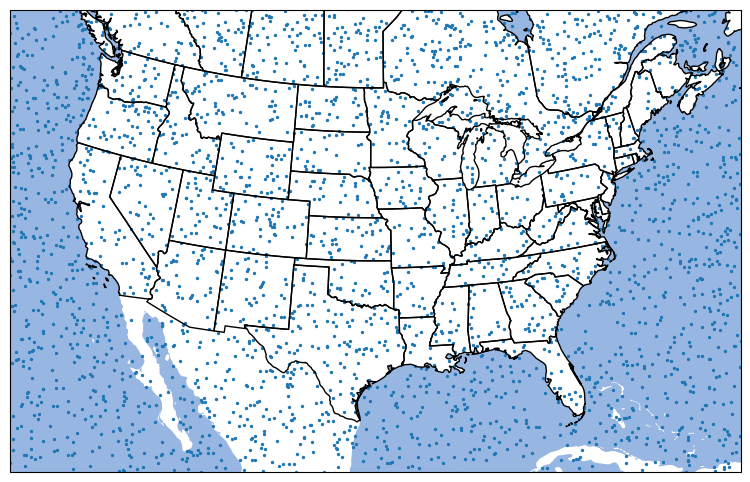

In [8]:
plot_us(rand_gdf)

## Load Cartographic Boundary Data from the US Census
We download US State boundary shape files from here: https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html, and then read the shp file with GeoPandas.

In [9]:
states_gdf = geopandas.read_file('cb_2021_us_state_5m.shp')

In [10]:
states_gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,72,01779808,0400000US72,72,PR,Puerto Rico,00,8869135605,4922143005,"MULTIPOLYGON (((-65.33570 18.34953, -65.32933 ..."
1,22,01629543,0400000US22,22,LA,Louisiana,00,111915258185,23736382213,"MULTIPOLYGON (((-88.88145 30.05320, -88.87048 ..."
2,24,01714934,0400000US24,24,MD,Maryland,00,25151992308,6979074857,"MULTIPOLYGON (((-76.04862 38.01484, -76.04621 ..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105823653399,10274702852,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ..."
4,05,00068085,0400000US05,05,AR,Arkansas,00,134660767709,3121950081,"POLYGON ((-94.61792 36.49941, -94.55929 36.499..."


## Clip the Original Random Data and Plot

First we need to set the CRS of the random data to the same CRS as states_gdf.

In [11]:
rand_gdf.crs = states_gdf.crs

Next we can clip the random data using the clip() function from GeoPandas.

In [12]:
texas_rand_gdf = rand_gdf.clip(states_gdf.geometry[states_gdf.NAME=='Texas'])

In [13]:
texas_rand_gdf

,latitude,longitude,geometry
40492,32.287303,-102.294328,POINT (-102.29433 32.28730)
45907,32.377291,-100.886789,POINT (-100.88679 32.37729)
74540,32.696293,-101.033286,POINT (-101.03329 32.69629)
91608,32.783297,-102.765444,POINT (-102.76544 32.78330)
84462,32.853424,-103.045157,POINT (-103.04516 32.85342)
...,...,...,...
53952,31.932235,-102.816910,POINT (-102.81691 31.93224)
77315,32.177015,-102.162688,POINT (-102.16269 32.17702)
54754,31.720378,-105.688082,POINT (-105.68808 31.72038)
30596,31.832938,-104.690209,POINT (-104.69021 31.83294)


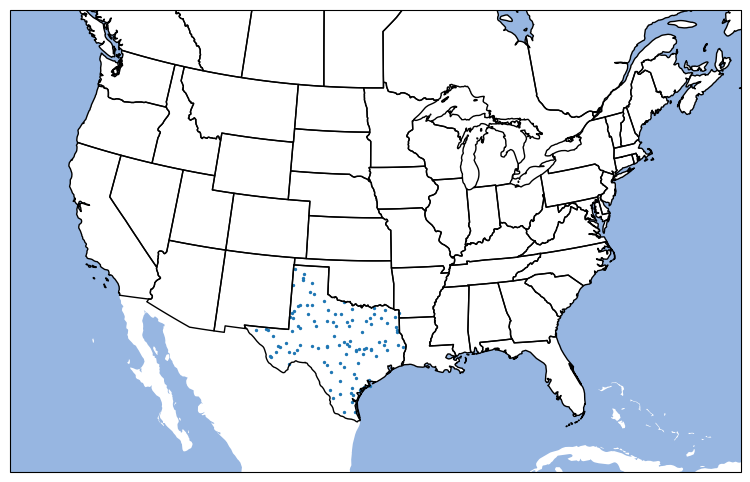

In [14]:
plot_us(texas_rand_gdf)

This same process can be followed with the entire US boundary shape files also found on the US Census website.